# Exploratory Data Analysis – Credit Card Fraud Data

This notebook analyzes bank transaction data from `creditcard.csv`, focusing on fraud patterns and class imbalance.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

credit_df = pd.read_csv("../data/raw/creditcard.csv")
credit_df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Imbalance Analysis


In [3]:
credit_df["Class"].value_counts(normalize=True) * 100


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

## Transaction Amount Distribution


c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


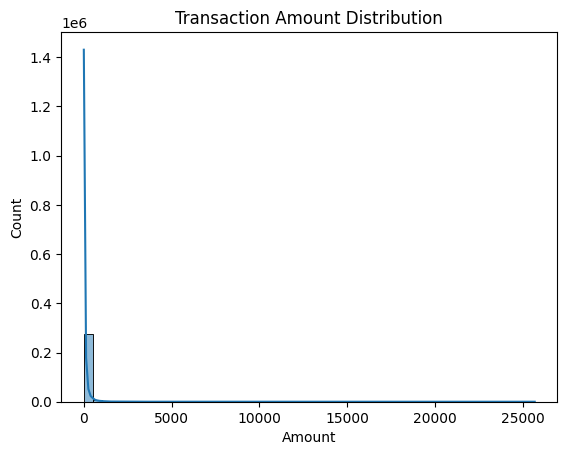

In [4]:
sns.histplot(credit_df["Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


# Class Imbalance Handling

In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_cc = credit_df.drop(columns=['Class'])
y_cc = credit_df['Class']

print("Original class distribution (Credit Card):")
print(Counter(y_cc))

Original class distribution (Credit Card):
Counter({0: 284315, 1: 492})


In [6]:
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(
    X_cc, y_cc,
    test_size=0.2,
    stratify=y_cc,
    random_state=42
)

print("Training set distribution BEFORE resampling:")
print(Counter(y_train_cc))


Training set distribution BEFORE resampling:
Counter({0: 227451, 1: 394})


# Approach 1: SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

smote_cc = SMOTE(random_state=42)

X_train_cc_smote, y_train_cc_smote = smote_cc.fit_resample(
    X_train_cc,
    y_train_cc
)

print("Training set distribution AFTER SMOTE:")
print(Counter(y_train_cc_smote))


Training set distribution AFTER SMOTE:
Counter({0: 227451, 1: 227451})


# 🧪 Train Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

cc_smote_model = LogisticRegression(max_iter=1000)
cc_smote_model.fit(X_train_cc_smote, y_train_cc_smote)


c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [9]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred_cc_smote = cc_smote_model.predict(X_test_cc)

print(confusion_matrix(y_test_cc, y_pred_cc_smote))
print(classification_report(y_test_cc, y_pred_cc_smote))


[[56247   617]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.90      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [10]:
# Predicted Probabilities
y_probs = cc_smote_model.predict_proba(X_test_cc)[:, 1]


In [12]:
# Try a Higher Threshold (e.g. 0.8)
from tkinter import _test


threshold = 0.9
y_pred_threshold = (y_probs >= threshold).astype(int)

print("CONFUSION MATRIX (Threshold = 0.8)")
print(confusion_matrix(y_test_cc, y_pred_threshold))

print("\nCLASSIFICATION REPORT")
print(classification_report(y_test_cc, y_pred_threshold))

CONFUSION MATRIX (Threshold = 0.8)
[[56731   133]
 [   12    86]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.88      0.54        98

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962



# Approach 2: Class Weight Balancing

In [13]:
cc_balanced_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

cc_balanced_model.fit(X_train_cc, y_train_cc)


c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [14]:
y_pred_cc_balanced = cc_balanced_model.predict(X_test_cc)

print(confusion_matrix(y_test_cc, y_pred_cc_balanced))
print(classification_report(y_test_cc, y_pred_cc_balanced))


[[55202  1662]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



# 🟨 Model Comparison

In [15]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_smote = roc_auc_score(
    y_test_cc,
    cc_smote_model.predict_proba(X_test_cc)[:, 1]
)

roc_balanced = roc_auc_score(
    y_test_cc,
    cc_balanced_model.predict_proba(X_test_cc)[:, 1]
)

pr_smote = average_precision_score(
    y_test_cc,
    cc_smote_model.predict_proba(X_test_cc)[:, 1]
)

pr_balanced = average_precision_score(
    y_test_cc,
    cc_balanced_model.predict_proba(X_test_cc)[:, 1]
)

print("ROC-AUC:")
print(f"SMOTE: {roc_smote:.3f}")
print(f"Class Weight: {roc_balanced:.3f}")

print("\nPR-AUC:")
print(f"SMOTE: {pr_smote:.3f}")
print(f"Class Weight: {pr_balanced:.3f}")


ROC-AUC:
SMOTE: 0.975
Class Weight: 0.973

PR-AUC:
SMOTE: 0.718
Class Weight: 0.729


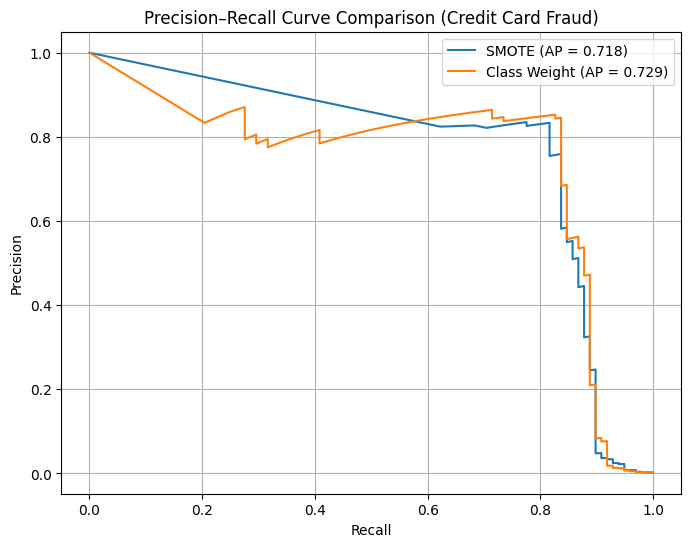

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class (fraud = 1)
y_probs_smote = cc_smote_model.predict_proba(X_test_cc)[:, 1]
y_probs_balanced = cc_balanced_model.predict_proba(X_test_cc)[:, 1]

precision_smote, recall_smote, _ = precision_recall_curve(
    y_test_cc, y_probs_smote
)

precision_balanced, recall_balanced, _ = precision_recall_curve(
    y_test_cc, y_probs_balanced
)

plt.figure(figsize=(8, 6))

plt.plot(
    recall_smote,
    precision_smote,
    label=f"SMOTE (AP = {pr_smote:.3f})"
)

plt.plot(
    recall_balanced,
    precision_balanced,
    label=f"Class Weight (AP = {pr_balanced:.3f})"
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison (Credit Card Fraud)")
plt.legend()
plt.grid(True)
plt.show()


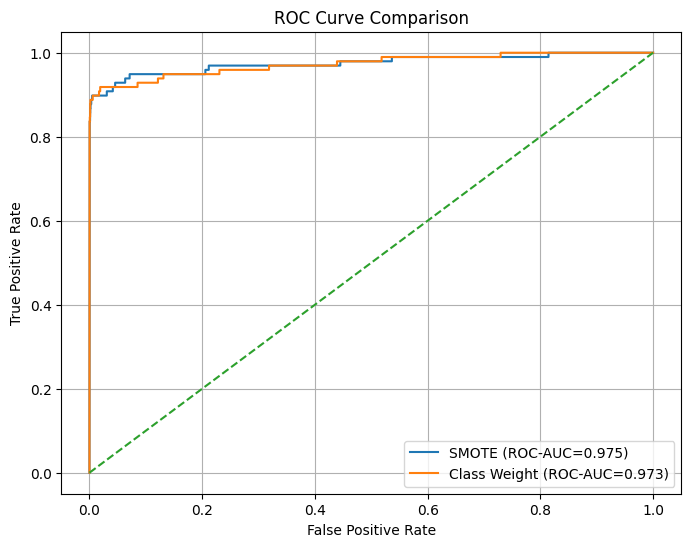

In [17]:
from sklearn.metrics import roc_curve

fpr_smote, tpr_smote, _ = roc_curve(y_test_cc, y_probs_smote)
fpr_balanced, tpr_balanced, _ = roc_curve(y_test_cc, y_probs_balanced)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"SMOTE (ROC-AUC={roc_smote:.3f})")
plt.plot(fpr_balanced, tpr_balanced, label=f"Class Weight (ROC-AUC={roc_balanced:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
